<h1 style="font-size:32px; text-align:center;">Predicting Loan Status: HMEQ Dataset</h1>
<hr>
<h1 style="font-size:18px; text-align:center; margin-bottom:24px;">Carl Lejerskar</h1>
<hr>

### Reading Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('hmeq.csv')
print(df.shape)
df.head()

(5960, 13)


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5442 non-null float64
VALUE      5848 non-null float64
REASON     5708 non-null object
JOB        5681 non-null object
YOJ        5445 non-null float64
DEROG      5252 non-null float64
DELINQ     5380 non-null float64
CLAGE      5652 non-null float64
NINQ       5450 non-null float64
CLNO       5738 non-null float64
DEBTINC    4693 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


As you can see, there are a lot of missing values, for DEBTINC especially, and thus data imputation will be necessary.

### Data Exploration

#### BAD (Target Variable)

[Text(0,0.5,'Percent')]

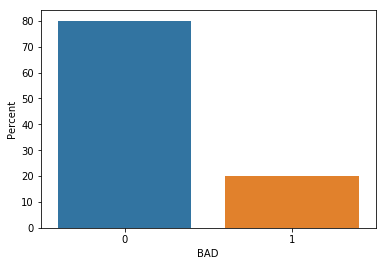

In [4]:
ax = sns.barplot(x=df.BAD, y=df.BAD, data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

About 80% of people do not default, meaning this is the baseline accuracy for classification. I will strive for an accuracy greater than 80% along with high recall/precision.

#### LOAN, MORTDUE, VALUE, YOJ

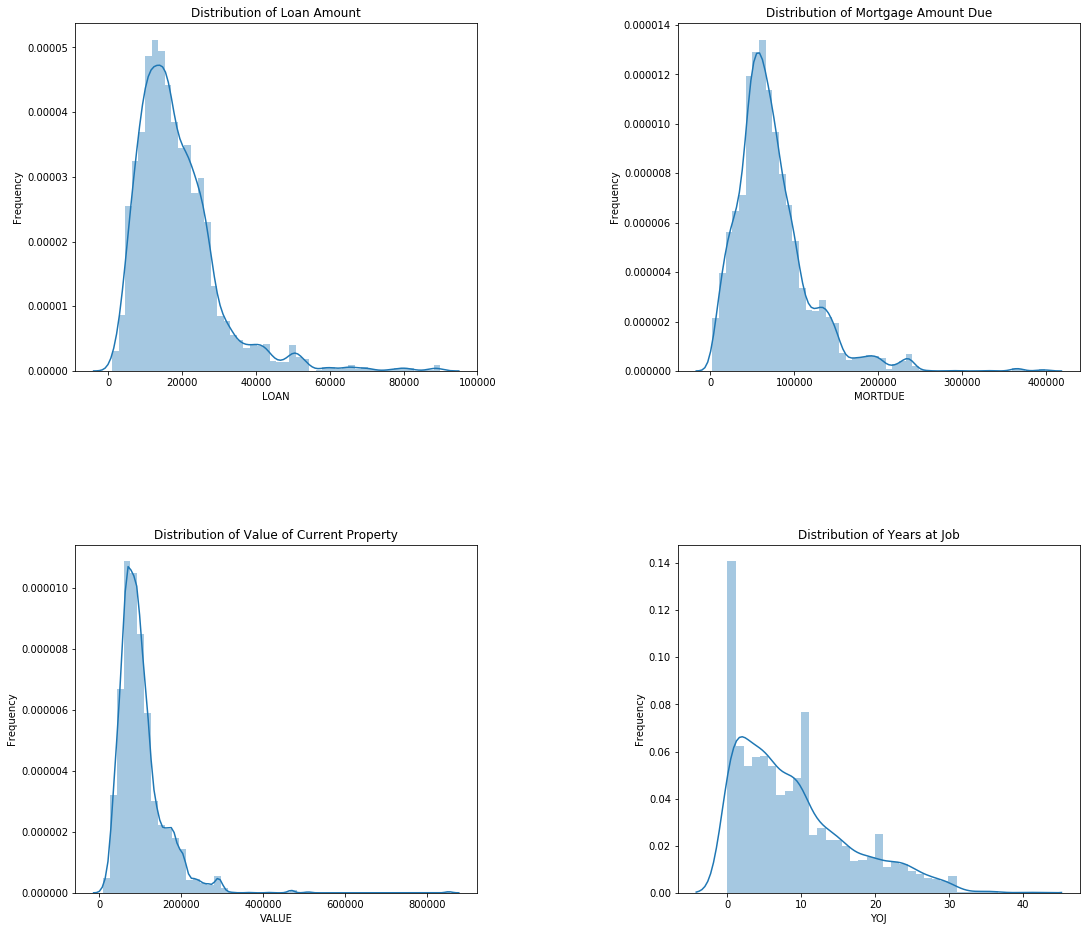

In [5]:
f, (ax1, ax2,ax3) = plt.subplots(1,3, sharex='col', sharey='row',figsize=(18, 16))
plt.subplot(2,2,1)
sns.distplot(df.LOAN.dropna())
plt.title('Distribution of Loan Amount')
plt.xlabel('LOAN')
plt.ylabel('Frequency')
plt.subplot(2,2,2)
sns.distplot(df.MORTDUE.dropna())
plt.title('Distribution of Mortgage Amount Due')
plt.ylabel('Frequency')
plt.xlabel('MORTDUE')
plt.subplot(2,2,3)
sns.distplot(df.VALUE.dropna())
plt.title('Distribution of Value of Current Property')
plt.xlabel('VALUE')
plt.ylabel('Frequency')
plt.subplot(2,2,4)
#sns.boxplot(y=df.DEROG, x=df.BAD)
plt.title('Distribution of Years at Job')
sns.distplot(df.YOJ.dropna())
plt.xlabel('YOJ')
plt.ylabel('Frequency')
plt.subplots_adjust(hspace=.5, wspace = .5)
plt.show()

The distributions seem to be skewed left, especially YOJ. Perhaps a log transformation would be beneficial.

Log transformation should not be a problem; however, a small value must be added to YOJ as it has a minimum value of 0.

In [68]:
print('YOJ',df.YOJ.min())
df.YOJ = df.YOJ.apply(lambda t : np.log(t+1))

YOJ 0.0


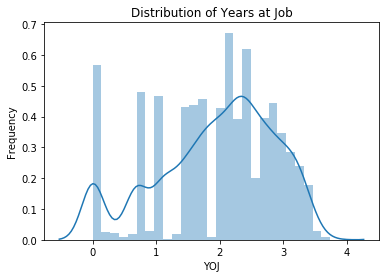

In [7]:
sns.distplot(df.YOJ.dropna())
plt.title('Distribution of Years at Job')
plt.xlabel('YOJ')
plt.ylabel('Frequency')
plt.subplots_adjust(hspace=.5, wspace = .5)
plt.show()

The distribution of YOJ does not look perfect, but it looks much better.

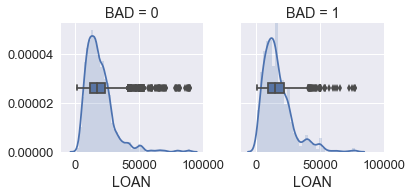

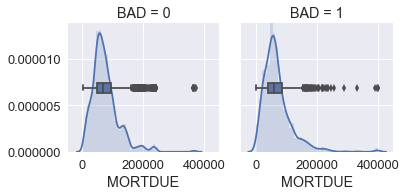

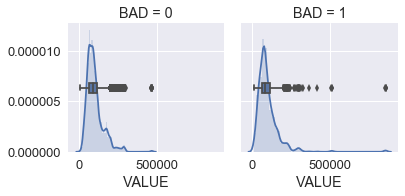

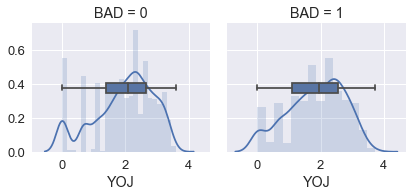

In [8]:
sns.set(font_scale=1.3)

def dist_boxplot(x, **kwargs):
    ax = sns.distplot(x, hist_kws=dict(alpha=0.2))
    ax2 = ax.twinx()
    sns.boxplot(x=x, ax=ax2)
    ax2.set(ylim=(-5, 5))

g = sns.FacetGrid(df, col="BAD")
G1 = g.map(dist_boxplot, 'LOAN', data = df)

g = sns.FacetGrid(df, col="BAD")
G2 = g.map(dist_boxplot, 'MORTDUE', data = df)

g = sns.FacetGrid(df, col="BAD")
G3 = g.map(dist_boxplot, 'VALUE', data = df)

g = sns.FacetGrid(df, col="BAD")
G4 = g.map(dist_boxplot, 'YOJ', data = df)


Distributions seem similar relative to the target distribution.

#### REASON, JOB, DEROG, DELINQ

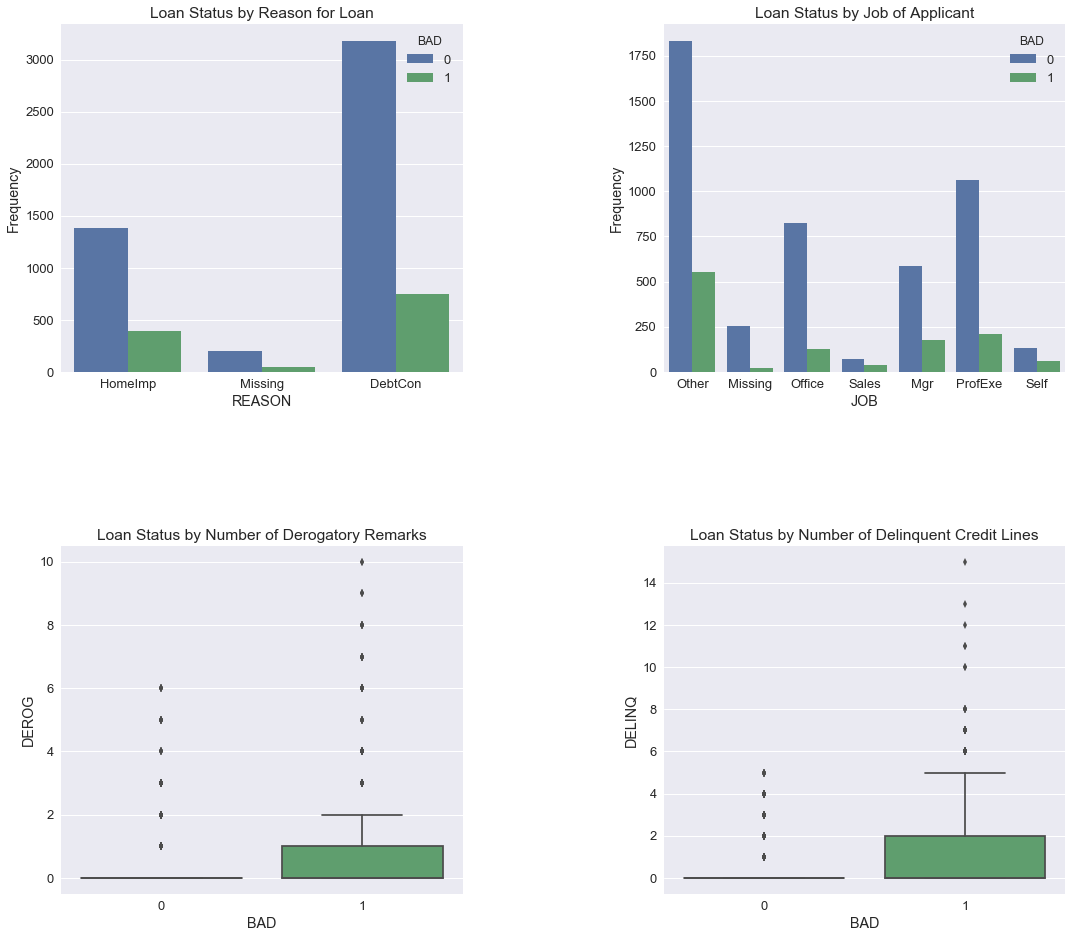

In [9]:
f, (ax1, ax2,ax3) = plt.subplots(1,3, sharex='col', sharey='row',figsize=(18, 16))
plt.subplot(2,2,1)
x = df.REASON.copy()
x[pd.isnull(x)==True] = 'Missing'
sns.countplot(x, hue = df.BAD)
plt.title('Loan Status by Reason for Loan')
plt.xlabel('REASON')
plt.ylabel('Frequency')
plt.subplot(2,2,2)
x = df.JOB.copy()
x[pd.isnull(x)==True] = 'Missing'
sns.countplot(x, hue=df.BAD)
plt.title('Loan Status by Job of Applicant')
plt.ylabel('Frequency')
plt.xlabel('JOB')
plt.subplot(2,2,3)
sns.boxplot(y=df.DEROG, x=df.BAD)
plt.title('Loan Status by Number of Derogatory Remarks')
plt.xlabel('BAD')
plt.ylabel('DEROG')
plt.subplot(2,2,4)
sns.boxplot(y=df.DELINQ, x=df.BAD)
plt.title('Loan Status by Number of Delinquent Credit Lines')
plt.xlabel('BAD')
plt.ylabel('DELINQ')
plt.subplots_adjust(hspace=.5, wspace = .5)
plt.show()

Most loans are for debt consolidation rather than home improvement. A small amount of values are missing. The ratios of BAD seems to vary by reason, indicating a possible predictor. Most persons seeking loans have a job falling under 'other'. The distribution of the target variable seems to vary by job, meaning this could be a potentially relevant predictor. Distribution of DEROG and DELINQ relative to the target variable seem to vary, indicating potentially useful features.

#### CLAGE, NINQ, CLNO, DEBTINC

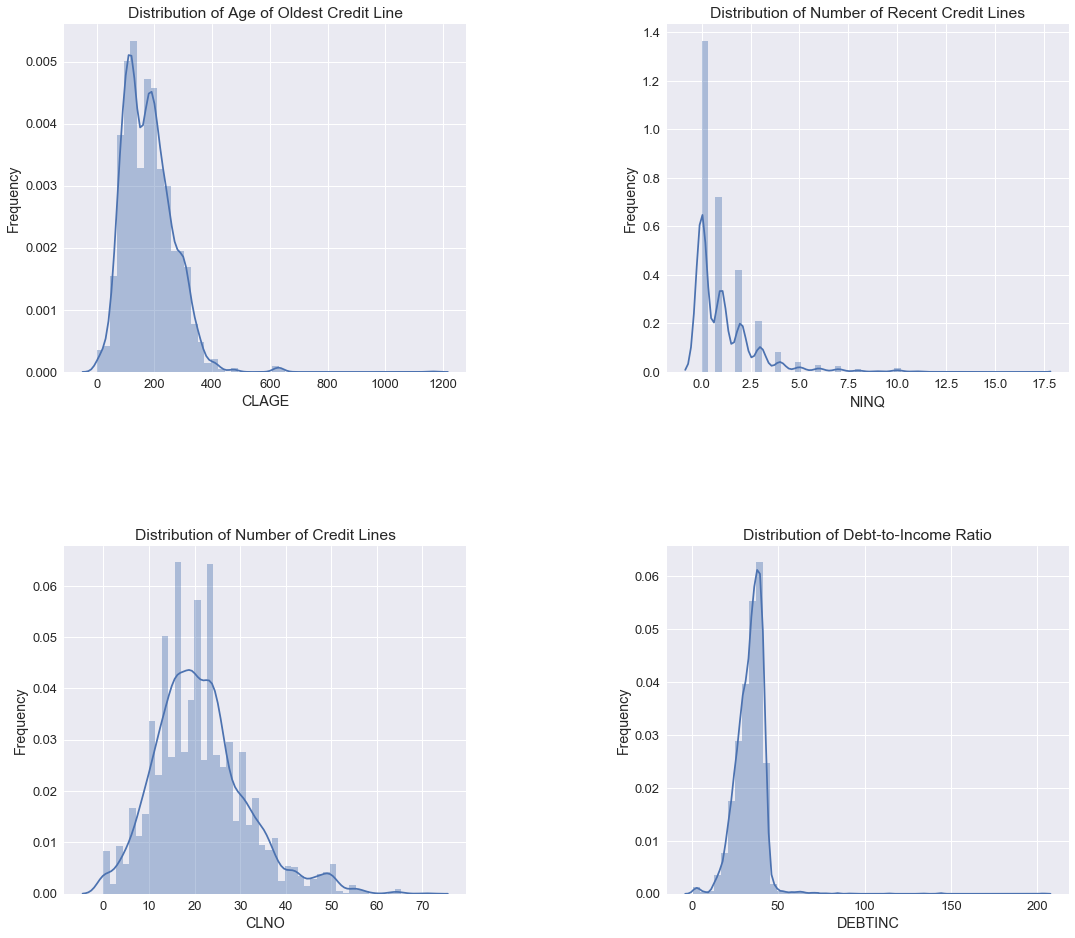

In [10]:
f, (ax1, ax2,ax3) = plt.subplots(1,3, sharex='col', sharey='row',figsize=(18, 16))
plt.subplot(2,2,1)
sns.distplot(df.CLAGE.dropna())
plt.title('Distribution of Age of Oldest Credit Line')
plt.xlabel('CLAGE')
plt.ylabel('Frequency')
plt.subplot(2,2,2)
sns.distplot(df.NINQ.dropna())
plt.title('Distribution of Number of Recent Credit Lines')
plt.ylabel('Frequency')
plt.xlabel('NINQ')
plt.subplot(2,2,3)
sns.distplot(df.CLNO.dropna())
plt.title('Distribution of Number of Credit Lines')
plt.xlabel('CLNO')
plt.ylabel('Frequency')
plt.subplot(2,2,4)
plt.title('Distribution of Debt-to-Income Ratio')
sns.distplot(df.DEBTINC.dropna())
plt.xlabel('DEBTINC')
plt.ylabel('Frequency')
plt.subplots_adjust(hspace=.5, wspace = .5)
plt.show()

Log Transformation was attepted without much improvement, so those plots will be left out for brevity.

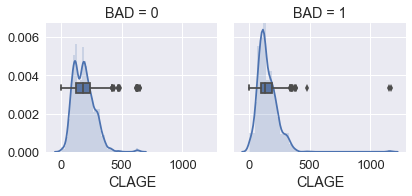

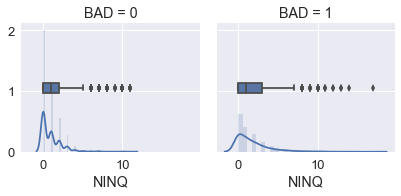

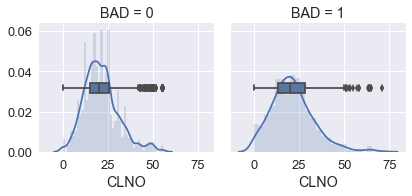

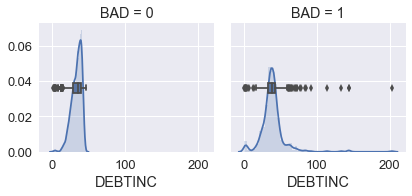

In [11]:
g = sns.FacetGrid(df, col="BAD")
G1 = g.map(dist_boxplot, 'CLAGE', data = df)

g = sns.FacetGrid(df, col="BAD")
G2 = g.map(dist_boxplot, 'NINQ', data = df)

g = sns.FacetGrid(df, col="BAD")
G3 = g.map(dist_boxplot, 'CLNO', data = df)

g = sns.FacetGrid(df, col="BAD")
G4 = g.map(dist_boxplot, 'DEBTINC', data = df)


CLAGE, NINQ, CLNO and DEBTINC all seem to vary a fair amount relative to the target variable and can serve as potential predictors.

### Data Imputation

#### DEBTINC

First let us check if average DEBTINC varies based on another categorical feature, REASON.

In [12]:
import numpy as np
print(np.mean(df.loc[df.REASON == 'HomeImp','DEBTINC']))
print(np.mean(df.loc[df.REASON == 'DebtCon','DEBTINC']))
print(np.mean(df.loc[pd.isnull(df.REASON) == True,'DEBTINC']))

33.28006315694148
34.30879626553258
28.83072219953724


Seems to vary a lot, especially for missing/non-missing values of REASON. Let's impute these means.

In [69]:
df.loc[(df.REASON == 'HomeImp') & (pd.isnull(df.DEBTINC) == True),'DEBTINC'] = np.mean(df.loc[df.REASON == 'HomeImp','DEBTINC'])
df.loc[(df.REASON == 'DebtCon') & (pd.isnull(df.DEBTINC) == True),'DEBTINC'] = np.mean(df.loc[df.REASON == 'DebtCon','DEBTINC'])
df.loc[(pd.isnull(df.REASON) == True) & (pd.isnull(df.DEBTINC) == True),'DEBTINC'] = np.mean(df.loc[pd.isnull(df.REASON) == True,'DEBTINC'])

#### DELINQ and JOB

In [70]:
df.loc[pd.isnull(df.DELINQ)==True, 'DELINQ'] = 0
df.loc[pd.isnull(df.JOB)==True, 'JOB'] = 'Missing'

The mode was simply imputed for DELINQ, and missing values were given their own category for job.

#### Dropping NA's

In [71]:
df = df.dropna()

In [72]:
df.shape

(4359, 13)

#### Model Tuning/Selection

As showed earlier, the default rate from the entire dataset is ~20%, so if the model simply predicted 0 (no default), the accuracy would be ~80%. Thus we must look at precision and recall. If this model was actually used to predict whether or not a loan would default, it would be very worthwhile to correctly identify those who would default as money would be saved, while it wouldn't be detrimental to reject a good loan as there is a large pool of loan applicants. Essentially, the money used to give out loans is much more limited than the pool of applicants, and thus recall is a more important metric than precision; however, a good balance is ideal as we do not want to reject a slew of good loans. Thus we will also consider the F1 score to evaluate if a good balance is met.

In [17]:
import sklearn
# Import models we'll employ 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Function for splitting training and test set
from sklearn.model_selection import train_test_split
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline
# For standardization
from sklearn.preprocessing import StandardScaler
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV
# Classification metrics (added later)
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, recall_score, precision_score

In [18]:
df2 = pd.get_dummies(df, df.dtypes[(df.dtypes==np.object) | (df.dtypes=='category')].index.values, drop_first=True)
df2.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Missing,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.0,2.442347,0.0,0.0,94.366667,1.0,9.0,33.280063,1,0,0,1,0,0,0
1,1,1300,70053.0,68400.0,2.079442,0.0,2.0,121.833333,0.0,14.0,33.280063,1,0,0,1,0,0,0
2,1,1500,13500.0,16700.0,1.609438,0.0,0.0,149.466667,1.0,10.0,33.280063,1,0,0,1,0,0,0
4,0,1700,97800.0,112000.0,1.386294,0.0,0.0,93.333333,0.0,14.0,33.280063,1,0,1,0,0,0,0
5,1,1700,30548.0,40320.0,2.302585,0.0,0.0,101.466002,1.0,8.0,37.113614,1,0,0,1,0,0,0


In [19]:
y = df2.BAD
X = df2.drop('BAD', axis = 1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 1551, 
                                                    stratify = df2.BAD)

In [21]:
pipelines = {
    'l2': make_pipeline(StandardScaler(), LogisticRegression(random_state=123)),
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123)),
    'lda': LinearDiscriminantAnalysis()
}

In [22]:

l2_hyperparams = {
    'logisticregression__C': np.linspace(1e-3, 1e3, 10)
}

In [23]:
rf_hyperparams = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', .33]
}

In [24]:
gb_hyperparams = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__learning_rate': [.05, .1, .2], 
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}

In [25]:
lda_hyperparams = {}

In [26]:
hyperparameters = {
    'l2': l2_hyperparams,
    'rf': rf_hyperparams,
    'gb': gb_hyperparams,
    'lda': lda_hyperparams
}

In [27]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv = 10, n_jobs = -1)
    
    # Fit model on X_train, y_train
    model.fit(X = X_train, y = y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print('{} has been fitted'.format(name))

l2 has been fitted
rf has been fitted
gb has been fitted
lda has been fitted


In [28]:
for model in fitted_models: #.84.925.92.838
    print(model, fitted_models[model].best_score_)

l2 0.8437051907083453
rf 0.9254373386865501
gb 0.9202753082879266
lda 0.8385431603097219


In [29]:
# Code here
for model in fitted_models:
    #create class probabilities
    pred = fitted_models[model].predict_proba(X_test)
    pred = [Class[1] for Class in pred]
    
    #create fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    
    #calculate auc
    mod_auc = auc(fpr, tpr)
    print(model, mod_auc)
    
print('\n')    
for model in fitted_models: 
    print(model, fitted_models[model].best_score_)

l2 0.8303092491094592
rf 0.9718405619374161
gb 0.9751566267070432
lda 0.8395108074513434


l2 0.8437051907083453
rf 0.9254373386865501
gb 0.9202753082879266
lda 0.8385431603097219


In [30]:
acc = []
for model in fitted_models:
    acc.append(accuracy_score(y_test, fitted_models[model].predict(X_test)))
    print(model, accuracy_score(y_test, fitted_models[model].predict(X_test)))

l2 0.8577981651376146
rf 0.9403669724770642
gb 0.9426605504587156
lda 0.8532110091743119


In [31]:
rec = []
for model in fitted_models:
    rec.append(recall_score(y_test, fitted_models[model].predict(X_test)))
    print(model, recall_score(y_test, fitted_models[model].predict(X_test)))

l2 0.3684210526315789
rf 0.7543859649122807
gb 0.7543859649122807
lda 0.3391812865497076


In [32]:
prec = []
for model in fitted_models: 
    prec.append(precision_score(y_test, fitted_models[model].predict(X_test)))
    print(model, precision_score(y_test, fitted_models[model].predict(X_test)))

l2 0.7974683544303798
rf 0.9280575539568345
gb 0.9416058394160584
lda 0.7945205479452054


In [33]:
from sklearn.metrics import f1_score
f = []
for model in fitted_models: 
    f.append(f1_score(y_test, fitted_models[model].predict(X_test)))
    print(model, f1_score(y_test, fitted_models[model].predict(X_test)))

l2 0.5039999999999999
rf 0.832258064516129
gb 0.8376623376623377
lda 0.47540983606557374


In [34]:
len(acc)

4

In [35]:
models = pd.DataFrame({
    'Accuracy Score': acc,
    'Recall Score' : rec,
    'F1 Score' : f,
    'Precision Score' : prec
})
models.index = ['Logistic Regression', 'Random Forest','Gradient Boosting Classifier', 'LDA']
models

,Accuracy Score,Recall Score,F1 Score,Precision Score
Logistic Regression,0.857798,0.368421,0.504000,0.797468
Random Forest,0.940367,0.754386,0.832258,0.928058
Gradient Boosting Classifier,0.942661,0.754386,0.837662,0.941606
LDA,0.853211,0.339181,0.475410,0.794521


Looking at the results above, it is clear that the Gradient Boosting Classifier performed the best according to our metric, with Random Forest performing comparably. The GBC had the highest accuracy of ~94%, highest recall of ~75%, highest F1 score of ~84%, and the highest precision of ~94%.

The GBC has an accuracy about 14 percentage points higher than the baselines of 80%, and about a 6% false positive rate, meaning it will correctly mark a Loan as defaulting 94% of the time. The F1 score is ~83%, showing a good balance of recall and precision.

#### Resampling - Oversampling with Smote

To correctly perform resampling, we must avoid the trap of splitting our data into testing and training after the resampling is performed, rather we perform resampling on the training set:

In [54]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

C:\Users\Carl\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [55]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv = 10, n_jobs = -1)
    
    # Fit model on X_train, y_train
    model.fit(X = X_train_res, y = y_train_res)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print('{} has been fitted'.format(name))

l2 has been fitted
rf has been fitted
gb has been fitted
lda has been fitted


In [56]:
for model in fitted_models:
    print(model, fitted_models[model].best_score_)

l2 0.7590941512125535
rf 0.9597004279600571
gb 0.9550641940085592
lda 0.7548145506419401


In [57]:
# Code here
for model in fitted_models:
    #create class probabilities
    pred = fitted_models[model].predict_proba(X_test)
    pred = [Class[1] for Class in pred]
    
    #create fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    
    #calculate auc
    mod_auc = auc(fpr, tpr)
    print(model, mod_auc)
    
print('\n')    
for model in fitted_models: 
    print(model, fitted_models[model].best_score_)

l2 0.8322363207114316
rf 0.981296560469171
gb 0.9739136238122649
lda 0.8324198513401907


l2 0.7590941512125535
rf 0.9597004279600571
gb 0.9550641940085592
lda 0.7548145506419401


In [58]:
acc = []
for model in fitted_models:
    acc.append(accuracy_score(y_test, fitted_models[model].predict(X_test)))
    print(model, accuracy_score(y_test, fitted_models[model].predict(X_test)))

l2 0.7763761467889908
rf 0.9552752293577982
gb 0.9438073394495413
lda 0.7855504587155964


In [59]:
rec = []
for model in fitted_models:
    rec.append(recall_score(y_test, fitted_models[model].predict(X_test)))
    print(model, recall_score(y_test, fitted_models[model].predict(X_test)))

l2 0.7076023391812866
rf 0.8538011695906432
gb 0.7894736842105263
lda 0.695906432748538


In [60]:
prec = []
for model in fitted_models: 
    prec.append(precision_score(y_test, fitted_models[model].predict(X_test)))
    print(model, precision_score(y_test, fitted_models[model].predict(X_test)))

l2 0.4548872180451128
rf 0.9125
gb 0.9121621621621622
lda 0.468503937007874


In [61]:
from sklearn.metrics import f1_score
f = []
for model in fitted_models: 
    f.append(f1_score(y_test, fitted_models[model].predict(X_test)))
    print(model, f1_score(y_test, fitted_models[model].predict(X_test)))

l2 0.5537757437070938
rf 0.8821752265861027
gb 0.8463949843260189
lda 0.5599999999999999


In [62]:
models = pd.DataFrame({
    'Accuracy Score': acc,
    'Recall Score' : rec,
    'F1 Score' : f,
    'Precision Score' : prec
})
models.index = ['Logistic Regression', 'Random Forest','Gradient Boosting Classifier', 'LDA']
models

,Accuracy Score,Recall Score,F1 Score,Precision Score
Logistic Regression,0.776376,0.707602,0.553776,0.454887
Random Forest,0.955275,0.853801,0.882175,0.912500
Gradient Boosting Classifier,0.943807,0.789474,0.846395,0.912162
LDA,0.785550,0.695906,0.560000,0.468504


Here Random Forest clearly performed the best, with an accuracy about 16 percentage points higher than the baseline, a recall of about 85%, an F1 Score of ~88%, and a precision of ~91%. This model is an improvement over the Gradient Boosting Classifier created without oversampling, as it recalls 10% more of the defaulting loans in the testing set while still having a false positive rate less than 10%.

#### Resampling - Undersampling

In [45]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True)
X_res, y_res, idx_resampled = rus.fit_sample(X_train, y_train)

In [46]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv = 10, n_jobs = -1)
    
    # Fit model on X_train, y_train
    model.fit(X = X_res, y = y_res)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print('{} has been fitted'.format(name))

l2 has been fitted
rf has been fitted
gb has been fitted
lda has been fitted


In [47]:
for model in fitted_models:
    print(model, fitted_models[model].best_score_)

l2 0.7342606149341142
rf 0.8704245973645681
gb 0.863103953147877
lda 0.7254758418740849


In [48]:
# Code here
for model in fitted_models:
    #create class probabilities
    pred = fitted_models[model].predict_proba(X_test)
    pred = [Class[1] for Class in pred]
    
    #create fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    
    #calculate auc
    mod_auc = auc(fpr, tpr)
    print(model, mod_auc)
    
print('\n')    
for model in fitted_models: 
    print(model, fitted_models[model].best_score_)

l2 0.8336378273310474
rf 0.9552685803905865
gb 0.95371691234744
lda 0.8249368070675976


l2 0.7342606149341142
rf 0.8704245973645681
gb 0.863103953147877
lda 0.7254758418740849


In [49]:
acc = []
for model in fitted_models:
    acc.append(accuracy_score(y_test, fitted_models[model].predict(X_test)))
    print(model, accuracy_score(y_test, fitted_models[model].predict(X_test)))

l2 0.7809633027522935
rf 0.8807339449541285
gb 0.8979357798165137
lda 0.7912844036697247


In [50]:
rec = []
for model in fitted_models:
    rec.append(recall_score(y_test, fitted_models[model].predict(X_test)))
    print(model, recall_score(y_test, fitted_models[model].predict(X_test)))

l2 0.7426900584795322
rf 0.8830409356725146
gb 0.8771929824561403
lda 0.695906432748538


In [51]:
prec = []
for model in fitted_models: 
    prec.append(precision_score(y_test, fitted_models[model].predict(X_test)))
    print(model, precision_score(y_test, fitted_models[model].predict(X_test)))

l2 0.4635036496350365
rf 0.6425531914893617
gb 0.6880733944954128
lda 0.4779116465863454


In [52]:
from sklearn.metrics import f1_score
f = []
for model in fitted_models: 
    f.append(f1_score(y_test, fitted_models[model].predict(X_test)))
    print(model, f1_score(y_test, fitted_models[model].predict(X_test)))

l2 0.5707865168539326
rf 0.7438423645320197
gb 0.7712082262210797
lda 0.5666666666666667


In [53]:
models = pd.DataFrame({
    'Accuracy Score': acc,
    'Recall Score' : rec,
    'F1 Score' : f,
    'Precision Score' : prec
})
models.index = ['Logistic Regression', 'Random Forest','Gradient Boosting Classifier', 'LDA']
models

,Accuracy Score,Recall Score,F1 Score,Precision Score
Logistic Regression,0.780963,0.742690,0.570787,0.463504
Random Forest,0.880734,0.883041,0.743842,0.642553
Gradient Boosting Classifier,0.897936,0.877193,0.771208,0.688073
LDA,0.791284,0.695906,0.566667,0.477912


Looking above, the models seem to perform worse, however, the highest recall of ~90% was achieved with Random Forest. The highest accuracy and F1 score were lower, and the precision scores were much lower overall.

#### Conclusions

The most balanced, overall best performing model in my opinion was the Random Forest model created with oversampled training data. This model had the highest F1 score of ~88%, showing a great balance of precision and recall, and also the highest overall accuracy of ~96%. It correctly identifies ~85% of bad loans as bad and only ~9% of loans identified as bad are actually good.

The model to choose, however, is based on the priorities of the bank giving out the loans. Imagine that a bank has a plethora of loan applications a day, but it has an extremely low risk tolerance. This means the bank must correctly identify the highest number of bad loans without any concern of rejecting too many good loans because new applicants are always around the corner. In this context, the Random Forest created with undersampled training data would be the best choice as it has a recall score of ~90%, meaning it finds ~5% more of the bad loans compared to the Random Forest created with oversampled training data, even though ~34% of loans identified as bad are actually good.